In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import ipywidgets as widgets

from src.pipeline.curve_fitting import fit_polynomial
from src.pipeline.perspective_transformation import transform_perspective
from src.pipeline.segmentation import segment_img
from src.pipeline.thresholding import thresh_img
from src.pipeline.undistortion import undist_img

In [3]:
image_path = "../../data/exam/images/image001.jpg"

img = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

In [4]:
mtx = cv.Mat(
    np.array(
        [
            [1.15777930e03, 0.00000000e00, 6.67111054e02],
            [0.00000000e00, 1.15282291e03, 3.86128937e02],
            [0.00000000e00, 0.00000000e00, 1.00000000e00],
        ]
    )
)
dist = cv.Mat(np.array([[-0.24688775, -0.02373133, -0.00109842, 0.00035108, -0.00258571]]))

In [105]:
def show_image(
    process_img: np.ndarray,
    title_1: str = "Processed Image",
    plt_hist: bool = False,
) -> None:
    ax3 = None
    
    if plt_hist:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    ax1.imshow(img)
    ax1.set_title("Original Image", fontsize=15)
    ax2.imshow(process_img)
    ax2.set_title(title_1, fontsize=15)

    if plt_hist and ax3 is not None:
        color = ("b", "g", "r")
        for i, col in enumerate(color):
            histr = cv.calcHist([process_img], [i], None, [256], [0, 256])
            ax3.plot(histr, color=col)
            ax3.set_xlim(left=0, right=256)

        ax3.set_aspect(0.005)
        ax3.set_title("Farbwerthistogramm", fontsize=15)

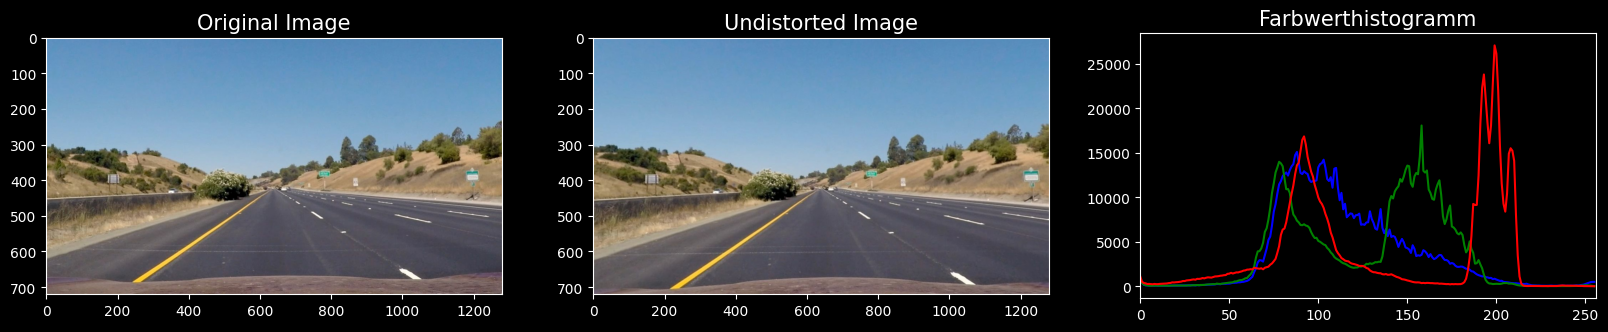

In [106]:
undist = undist_img(img, mtx, dist)
show_image(undist, "Undistorted Image", True)

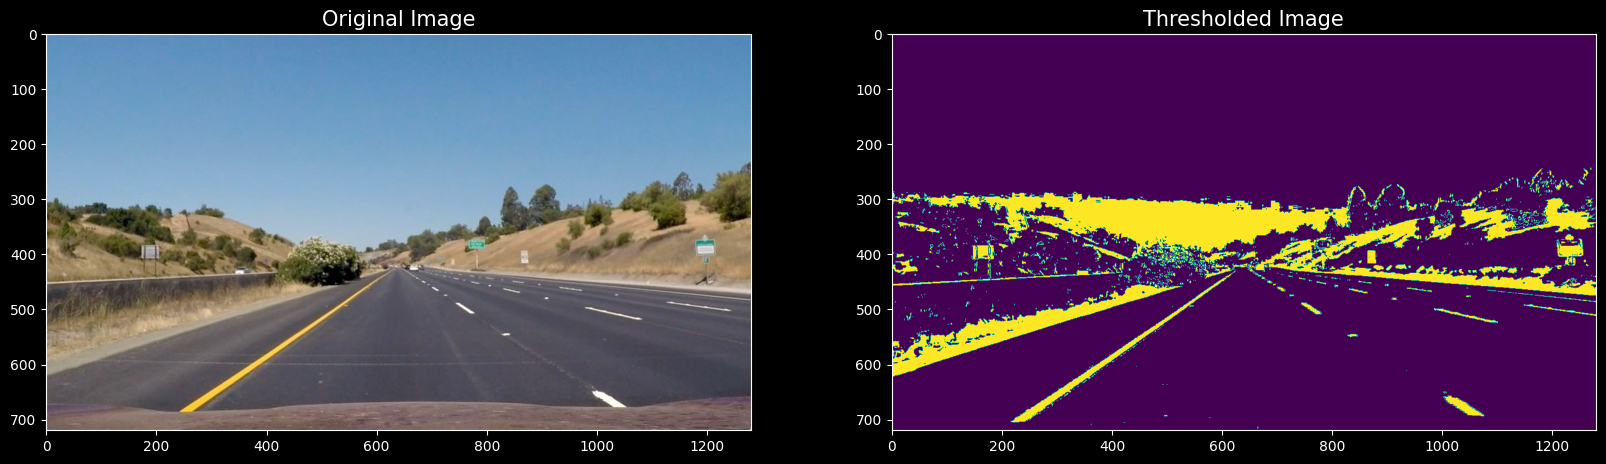

In [107]:
thresh = thresh_img(undist)
show_image(thresh, "Thresholded Image")

In [ ]:

region = segment_img(thresh)
transform = transform_perspective(region)
poly = fit_polynomial(transform)

: 